# 演習3-3 CNN の特徴抽出

Files already downloaded and verified


/Users/shouno/.pyenv/versions/3.10.3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/shouno/.pyenv/versions/3.10.3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


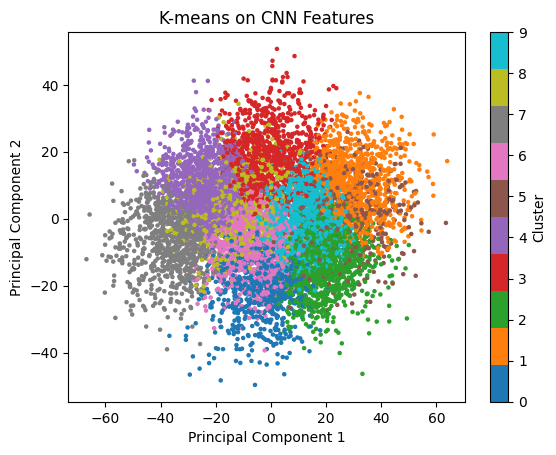

In [5]:
## 課題1: 特徴抽出とクラスタリング

import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import resnet18
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# データ準備
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
cifar10 = datasets.CIFAR10(root='./data', train=False, transform=data_transform, download=True)
data_loader = torch.utils.data.DataLoader(cifar10, batch_size=100, shuffle=False)

# ResNet18モデル（事前学習済み）
model = resnet18(pretrained=True)
model.eval()

# 特徴抽出
features = []
labels = []
with torch.no_grad():
    for inputs, targets in data_loader:
        outputs = model(inputs)
        features.append(outputs.numpy())
        labels.extend(targets.numpy())

features = np.concatenate(features)

# K-meansクラスタリング
kmeans = KMeans(n_clusters=10)
cluster_labels = kmeans.fit_predict(features)

# プロット（次元削減後）
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='tab10', s=5)
plt.colorbar(label='Cluster')
plt.title('K-means on CNN Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()